Project Topic
Is there a clear explanation of what this project
is about? Does it state clearly which type of
problem? E.g. classification or regression


# A Logistic Regression Analysis using the US Adult Income Dataset
### By Brittany Bilotti

In [1]:
#to switch directories in case dataset is in another folder
# import os

# # Current directory
# print("Current Directory:", os.getcwd())

# # Change directory
# new_directory = "../../Project/"
# os.chdir(new_directory)

# # Updated directory
# print("Updated Directory:", os.getcwd())

## Project Topic 

It is important to study the relationship between adult income and certain attributes in order to provide valuable insights as to what may influence income levels. Not only can this be useful in predicting the factors that contribute to an individual's income level, but it can provide helpful insight to government agencies, financial institutions and individual private companies on better governmental policy-making, workforce planning, and marketing to individual's within a certain income bracket.

<br> 
This project involves predicting the income levels of adults using a classification model. The dataset used for this will be the US Adult Income Dataset and it contains 15 numerical and categorical attributes some of which are age, education, occupation, marital status, and more.
<br>

###  Goals:
On the basis of the training data, I would like to:
<br>
* Develop a classification model that can accurately predict an adult's income level based on certain attributes 
* Find important predictors by analyzing the dataset in order to identify the attributes that have a significant impact on an individual's income level
* Assess the quality of the classification model's performance 
* Interpret the results to find meaningful conclusions about the data
* Discover any biases or limitations of the logistic regression model
<br>
<br>


In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
# sns.set() sets the color map to have a light blue background
import seaborn as sns; sns.set()
import patsy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2 
from sklearn import linear_model
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors as neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_predict
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Source and Description
This project uses the US Adult Income Dataset dataset from the UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/2/adult
This dataset contains information about individuals from the 1994 United States Census that represents a subset of the larger census data and is in the form of a CSV file with 14 predictors and 1 output variable (income level). The data is anonymized and does not include personally identifiable information.

In [3]:
# load in the dataset from the UCI Machine Learning Repository
# https://archive.ics.uci.edu/dataset/2/adult
# missing values have been marked with question marks, fill those in this step
income_df = pd.read_csv('adult.data', header=None, na_values=['?'])
income_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# get a sense of the factor data types 
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Factors
The dataset consists of a mix of categorical attributes (workclass, education, occupation) and numerical attributes (age, hours per week, capital gain/loss). It contains 32561 total data objects and 14 predictors so both n and p are relatively large.
<br>
 
Listed below are columns
<br>
* Age: Continuous numerical attribute representing the age of an individual <br>
* Workclass: Categorical attribute indicating the type of work class <br>
* Final Weight: Continuous numerical attribute representing the exact income <br>
* Education: Categorical attribute indicating the highest level of education completed by an individual <br>
* Education-Num: Continuous numerical attribute representing the numerical encoding of education levels <br>
* Marital Status: Categorical attribute indicating the marital status <br>
* Occupation: Categorical attribute indicating the occupation <br>
* Relationship: Categorical attribute indicating the relationship status of an individual <br>
* Race: Categorical attribute indicating the race of an individual <br>
* Sex: Categorical attribute indicating the gender of an individual <br>
* Capital Gain: Continuous numerical attribute representing the capital gains <br>
* Capital Loss: Continuous numerical attribute representing the capital losses <br>
* Hours per Week: Continuous numerical attribute representing the number of hours worked per week <br>
* Native Country: Categorical attribute indicating the native country of an individual <br>
* Income: Categorical attribute indicating whether an individual's income is above or below $50,000 annually <br>

## Exploration of Data Values and Data Types

In [5]:
# this column is likely 'Age'
income_df[0].head()

0    39
1    50
2    38
3    53
4    28
Name: 0, dtype: int64

In [6]:
# this column is likely 'Workclass'
income_df[1].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [7]:
# this column is likely 'Final Weight (exact income)'
income_df[2].head()

0     77516
1     83311
2    215646
3    234721
4    338409
Name: 2, dtype: int64

In [8]:
# this column is likely 'Education'
income_df[3].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [9]:
# this column is likely 'Education-Number'
income_df[4].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [10]:
# this column is likely 'Marital Status'
income_df[5].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
# this column is likely 'Occupation'
income_df[6].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [12]:
# this column is likely 'Relationship'
income_df[7].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [13]:
# this column is likely 'Race'
income_df[8].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [14]:
# this column is likely 'Gender'
income_df[9].unique()

array([' Male', ' Female'], dtype=object)

In [15]:
# this column is likely 'Capital Gain'
income_df[10].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [16]:
# this column is likely 'Capital Loss'
income_df[11].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

In [17]:
# this column is likely 'Hours Worked (per week)'
income_df[12].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [18]:
# this column is likely 'Native Country'
income_df[13].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [19]:
# this column is likely 'Income (above or below 50)'
income_df[14].unique()

array([' <=50K', ' >50K'], dtype=object)

## Data Cleaning

In [20]:
# set headers based on probable attribute names 
header = {0:'Age', 1:'Workclass', 2:'Exact Income', 3:'Education', 4:'Education-Num', 
          5:'Marital Status', 6:'Occupation', 7:'Relationship',
          8:'Race', 9:'Sex', 10:'Capital Gain',
          11:'Capital Loss', 12:'Hours per Week', 13:'Native Country', 
          14: 'Income'}

In [21]:
# Rename the dataframe's column values with the header variable
income_df = income_df.rename(columns = header)

In [22]:
income_df.head()

,Age,Workclass,Exact Income,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


I deemed it appropriate to exclude the "Capital Gain" and "Capital Loss" columns from the analysis. These specific attributes were determined to be irrelevant to the problem at hand. The information contained within these columns is already encapsulated in the "Exact Income" column, rendering them redundant for the purpose of understanding how the remaining attributes influence income. By removing these columns, the focus can be directed towards exploring the impact of other relevant attributes on income levels.

In [23]:
#dropping columns Capital Gain and Capital Loss as this data is not relevant to the problem
columns_to_drop =['Capital Gain', 'Capital Loss']
income_df = income_df.drop(columns=columns_to_drop, axis = 1)
income_df.head()

,Age,Workclass,Exact Income,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Native Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


As you can see of the value counts in the 'Workclass' column, it becomes apparent that a substantial majority of the entries are attributed to the 'Private' category. Given this observation, the 'Workclass' variable does not offer substantial variation or meaningful insights that could significantly contribute to the analysis so I decided to remove this category from the dataset. By doing so, the focus can be redirected towards the remaining attributes that bear greater relevance and potential for revealing valuable patterns and relationships.

In [24]:
income_df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [25]:
#dropping column Workclass
income_df = income_df.drop(columns='Workclass', axis = 1)


There was no need to drop any rows as there were no null values.

In [26]:
#checking to see for null values
null_values = income_df.isnull().sum()
#no null values so no need to fill with median
print(null_values)

Age               0
Exact Income      0
Education         0
Education-Num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours per Week    0
Native Country    0
Income            0
dtype: int64


## Data Transformations: Encode All Attributes As Numeric
 

Based on the presented visualizations and the examination of the min-max and z-score statistics below, it becomes apparent that the presence of high-income earners significantly distorts the mean and median values, leading to a skewed distribution. This poses notable challenges when conducting accurate calculations and visualizing the data. To surmount this predicament,I introduced two novel variables: "Income Category" and "Income Category Numeric."

The "Income Category Numeric" variable, which encompasses the numeric representation of income categories, serves as the target outcome. Leveraging this variable facilitates seamless plotting and visualization, enabling a more intuitive understanding of the data. Simultaneously, the "Income Category" variable acts as a valuable reference guide, providing information about the specific income level associated with each individual. By discretizing income levels into distinct bins, a comprehensive classification scheme is established, fostering a more nuanced analysis and interpretation of the data.

Furthermore, the decision was made to remove the previously utilized "Income" column. This choice was motivated by the desire to explore and examine the entirety of income categories, rather than solely focusing on whether an income exceeds or falls below $50,000. Such an inclusive analysis allows for a more thorough understanding of the dataset and its various income levels.

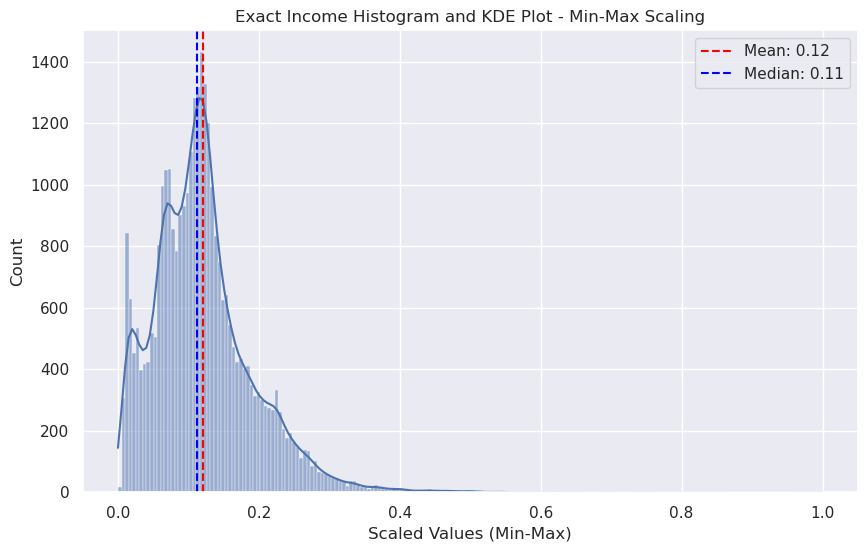

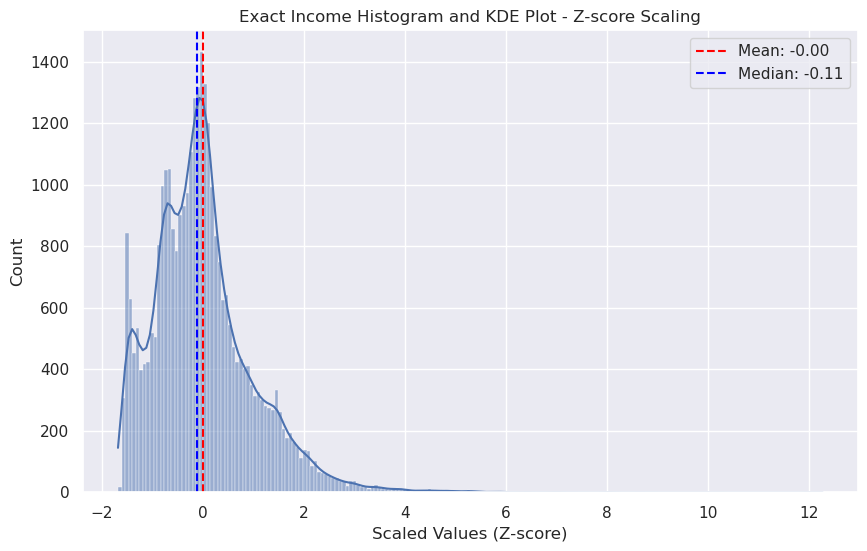

In [27]:
#min-max scaling
min_value = income_df['Exact Income'].min()
max_value = income_df['Exact Income'].max()
scaled_values_minmax = (income_df['Exact Income'] - min_value) / (max_value - min_value)

#mean and median for min-max scaled values
mean_minmax = scaled_values_minmax.mean()
median_minmax = scaled_values_minmax.median()


plt.figure(figsize=(10, 6))
sns.histplot(scaled_values_minmax, kde=True)
plt.axvline(mean_minmax, color='red', linestyle='--', label=f'Mean: {mean_minmax:.2f}')
plt.axvline(median_minmax, color='blue', linestyle='--', label=f'Median: {median_minmax:.2f}')
plt.title('Exact Income Histogram and KDE Plot - Min-Max Scaling')
plt.xlabel('Scaled Values (Min-Max)')
plt.ylabel('Count')
plt.legend()
plt.show()

#z-score scaling
mean_value = income_df['Exact Income'].mean()
std_value = income_df['Exact Income'].std()
scaled_values_zscore = (income_df['Exact Income'] - mean_value) / std_value

# mean and median for z-score scaled values
mean_zscore = scaled_values_zscore.mean()
median_zscore = scaled_values_zscore.median()

plt.figure(figsize=(10, 6))
sns.histplot(scaled_values_zscore, kde=True)
plt.axvline(mean_zscore, color='red', linestyle='--', label=f'Mean: {mean_zscore:.2f}')
plt.axvline(median_zscore, color='blue', linestyle='--', label=f'Median: {median_zscore:.2f}')
plt.title('Exact Income Histogram and KDE Plot - Z-score Scaling')
plt.xlabel('Scaled Values (Z-score)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [28]:
#interpreting min-max mean and median
new_min = 0.0
new_max = 1.0
old_min = 12285
old_max = 1484705
actual_mean = 0.12 * (max_value - min_value) + min_value
actual_median = 0.11  * (max_value - min_value) + min_value
print(actual_mean, actual_median)

188975.4 174251.2


In [29]:
#interpreting z-score mean and median

actual_Zmean = (-0.0 * std_value) + mean_value
actual_Zmedian = (-0.11 * std_value) + mean_value
print(actual_Zmean, actual_Zmedian)

189778.36651208502 178167.86896541255


In [30]:
income_bins = [0, 25000, 50000, 100000, 200000, 500000, 1000000, float('inf')]
income_labels = ['0-25000', '25000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000+']

#Creating a new column with income categories
income_df['Income Category'] = pd.cut(income_df['Exact Income'], bins=income_bins, labels=income_labels)

income_mapping = {'0-25000': 1, '25000-50000': 2, '50000-100000': 3, '100000-200000': 4, 
                  '200000-500000': 5, '500000-1000000': 6, '1000000+': 7}
income_df['Income Category Numeric'] = income_df['Income Category'].map(income_mapping)
income_df['Income Category Numeric'] = income_df['Income Category Numeric'].astype(int)

#dropping Income column
income_df = income_df.drop(columns=['Income'])

income_df.head()

,Age,Exact Income,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per Week,Native Country,Income Category,Income Category Numeric
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,50000-100000,3
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,50000-100000,3
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,200000-500000,5
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,200000-500000,5
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,200000-500000,5


Reference the category numbers:

In [31]:
income_df['Income Category'].unique()

['50000-100000', '200000-500000', '100000-200000', '25000-50000', '500000-1000000', '0-25000', '1000000+']
Categories (7, object): ['0-25000' < '25000-50000' < '50000-100000' < '100000-200000' < '200000-500000' < '500000-1000000' < '1000000+']

In [32]:
income_df['Income Category Numeric'].unique()

array([3, 5, 4, 2, 6, 1, 7])

All categorical variables in the dataset were converted into numeric variables for easier plotting and data analysis. The categories are printed below with their new numbers so plots can be easily interpreted.

In [33]:
categorical_vars = ['Race', 'Occupation', 'Marital Status', 'Sex', 'Native Country']

category_mapping = {}

# Encode categorical variables as numeric in income_df and store the mappings
for var in categorical_vars:
    label_encoder = LabelEncoder()
    income_df[var] = label_encoder.fit_transform(income_df[var])
    category_mapping[var] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

for var, mapping in category_mapping.items():
    print(f"{var} mapping:")
    for category, encoded_category in mapping.items():
        print(f"{category} : {encoded_category}")
    print()


Race mapping:
 Amer-Indian-Eskimo : 0
 Asian-Pac-Islander : 1
 Black : 2
 Other : 3
 White : 4

Occupation mapping:
 ? : 0
 Adm-clerical : 1
 Armed-Forces : 2
 Craft-repair : 3
 Exec-managerial : 4
 Farming-fishing : 5
 Handlers-cleaners : 6
 Machine-op-inspct : 7
 Other-service : 8
 Priv-house-serv : 9
 Prof-specialty : 10
 Protective-serv : 11
 Sales : 12
 Tech-support : 13
 Transport-moving : 14

Marital Status mapping:
 Divorced : 0
 Married-AF-spouse : 1
 Married-civ-spouse : 2
 Married-spouse-absent : 3
 Never-married : 4
 Separated : 5
 Widowed : 6

Sex mapping:
 Female : 0
 Male : 1

Native Country mapping:
 ? : 0
 Cambodia : 1
 Canada : 2
 China : 3
 Columbia : 4
 Cuba : 5
 Dominican-Republic : 6
 Ecuador : 7
 El-Salvador : 8
 England : 9
 France : 10
 Germany : 11
 Greece : 12
 Guatemala : 13
 Haiti : 14
 Holand-Netherlands : 15
 Honduras : 16
 Hong : 17
 Hungary : 18
 India : 19
 Iran : 20
 Ireland : 21
 Italy : 22
 Jamaica : 23
 Japan : 24
 Laos : 25
 Mexico : 26
 Nicaragua

## Basic Statistics of the Data

In [34]:
# basic statistical descriptions of the data 
income_df.describe()

,Age,Exact Income,Education-Num,Marital Status,Occupation,Race,Sex,Hours per Week,Native Country,Income Category Numeric
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,2.611836,6.572740,3.665858,0.669205,40.437456,36.718866,4.142041
std,13.640433,1.055500e+05,2.572720,1.506222,4.228857,0.848806,0.470506,12.347429,7.823782,0.900929
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,2.000000,3.000000,4.000000,0.000000,40.000000,39.000000,4.000000
50%,37.000000,1.783560e+05,10.000000,2.000000,7.000000,4.000000,1.000000,40.000000,39.000000,4.000000
75%,48.000000,2.370510e+05,12.000000,4.000000,10.000000,4.000000,1.000000,45.000000,39.000000,5.000000
max,90.000000,1.484705e+06,16.000000,6.000000,14.000000,4.000000,1.000000,99.000000,41.000000,7.000000


## Exploratory Data Analysis: Plots, Reasoning, and Plot Summaries
### Plot Reasoning
For each numeric factor, a comprehensive analysis was conducted, incorporating multiple visualizations including boxplots, scatter plots, histograms, and KDE overlays, accompanied by a thorough examination of their respective distributions. I chose boxplots, barplots and histograms to present the data in a succinct and easily interpretable manner, while also capturing essential characteristics such as outliers and skewness. Additionally, these visualizations enabled a clear visualization of the central tendency exhibited by each attribute, contributing to a comprehensive understanding of the dataset.

Boxplot analysis was used to easily summarize the data:

In [35]:
numeric_cols = ['Age', 'Education-Num', 'Marital Status', 'Occupation', 'Race', 'Sex', 
               'Hours per Week', 'Native Country', 'Income Category Numeric']

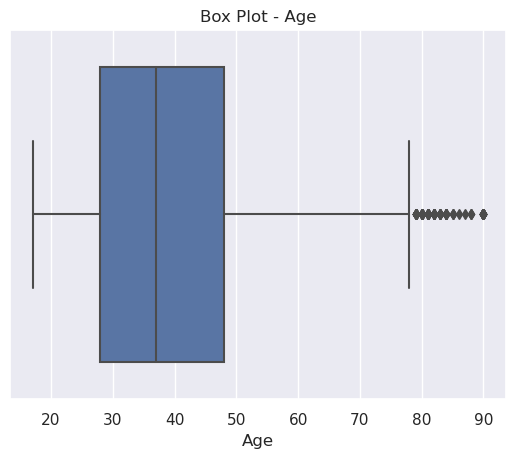

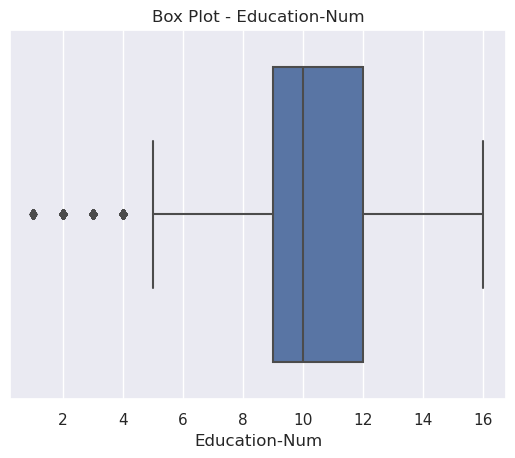

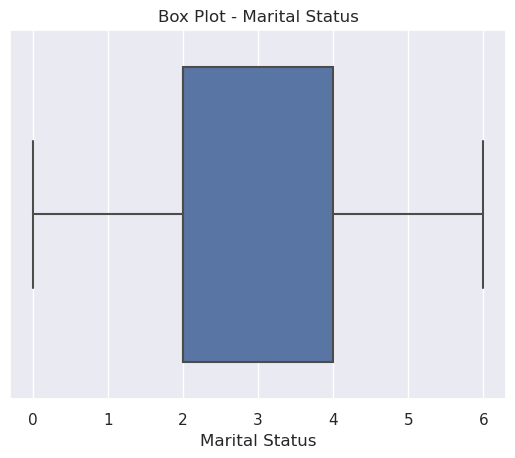

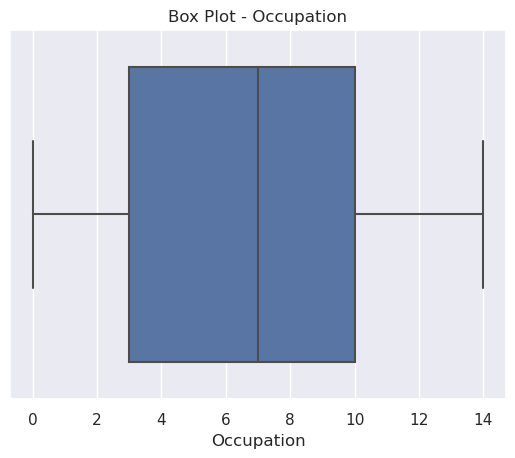

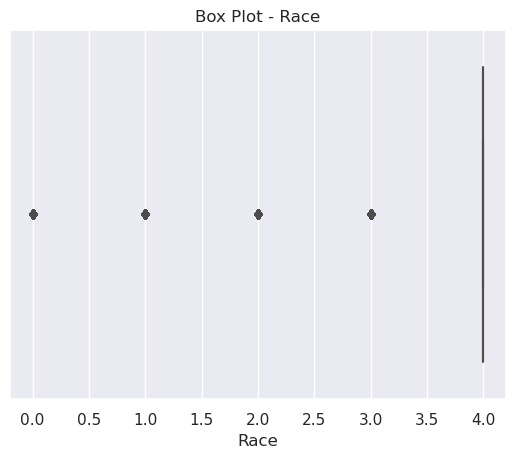

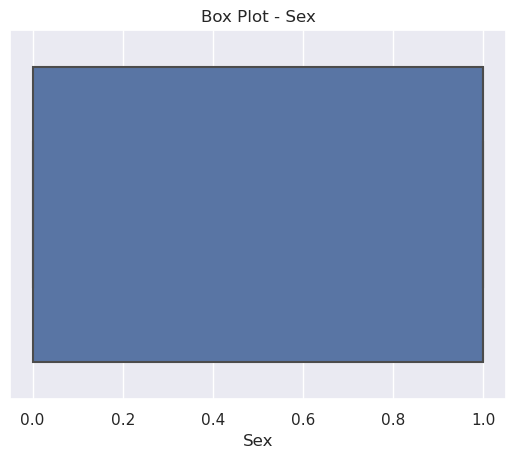

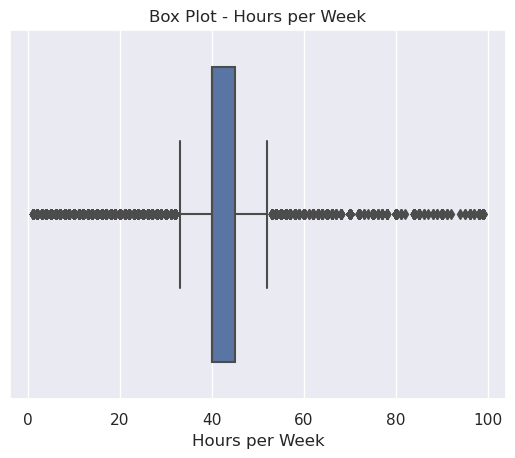

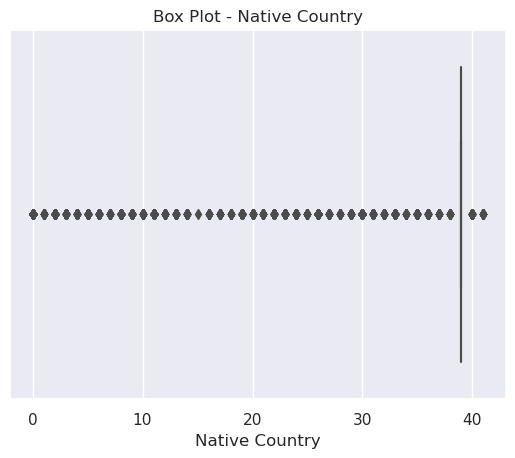

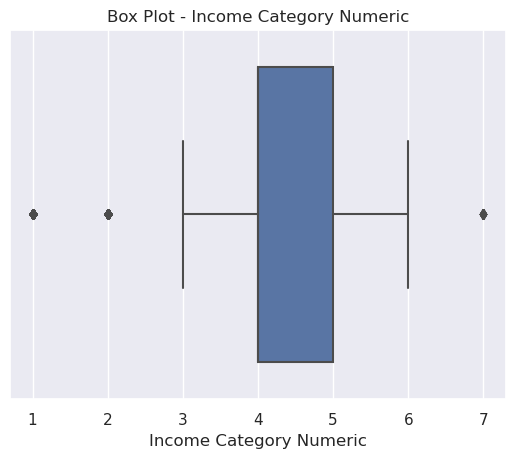

In [36]:
# Create box plots for each numeric column
for col in numeric_cols:
    sns.boxplot(x=col, data=income_df)
    plt.title(f'Box Plot - {col}')
    plt.show()


Since boxplots were not easily interpretable for Race, Sex, and Native Country as seen above, barplots were used:

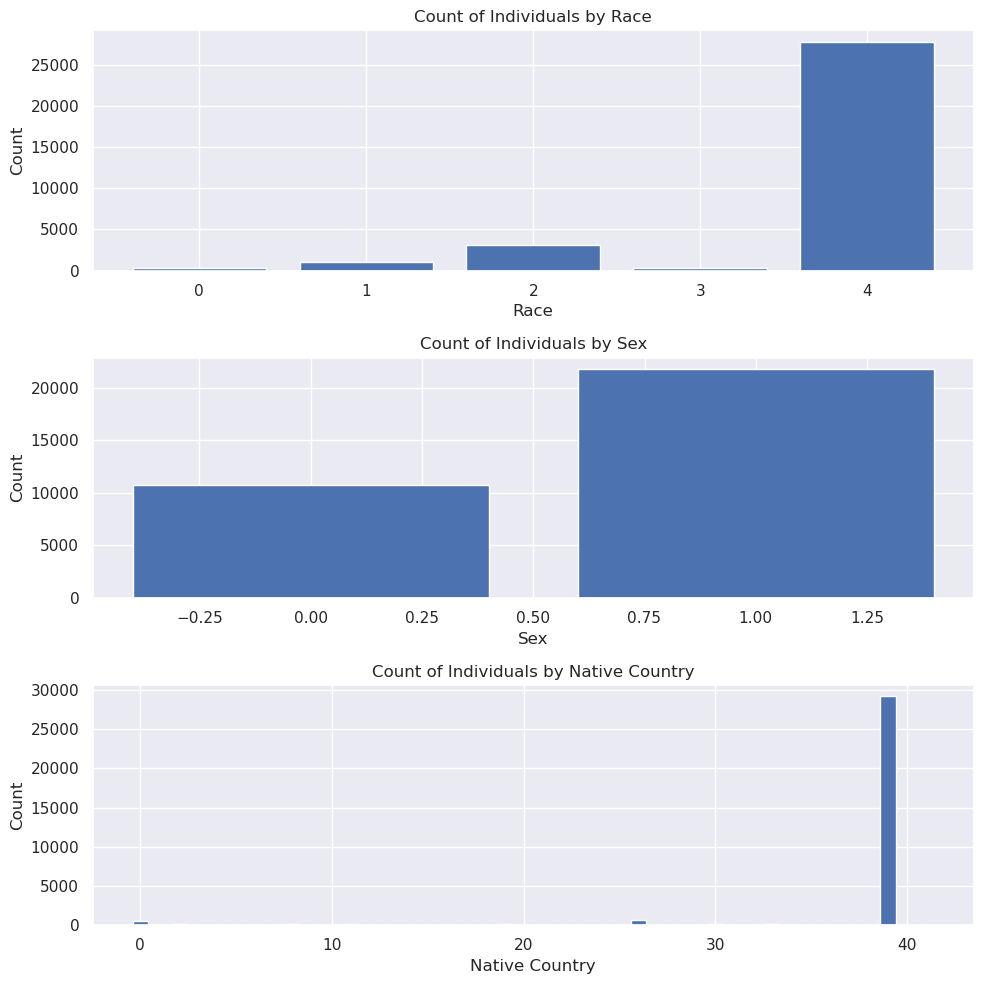

In [37]:
numeric_cols_bar = ['Race', 'Sex', 
               'Native Country']

fig, axes = plt.subplots(len(numeric_cols_bar), 1, figsize=(10, 10))

for i, attr in enumerate(numeric_cols_bar):
    counts = income_df[attr].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values)
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Count of Individuals by {attr}')
    plt.tight_layout()

plt.show()

Histogram and kde overlay to better view each attribute in more detail:

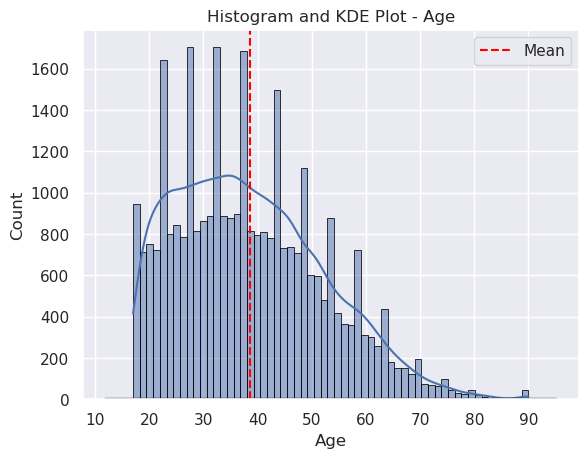

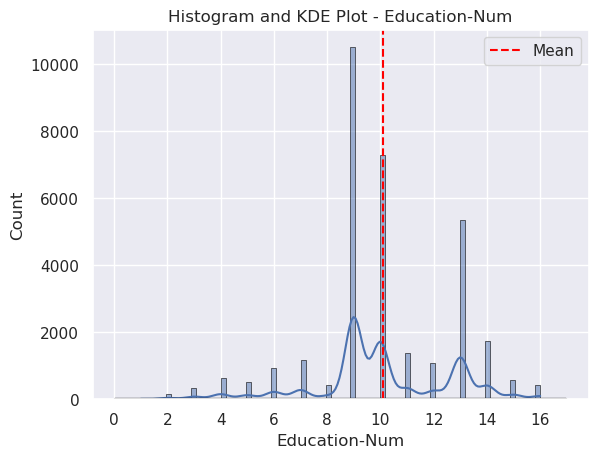

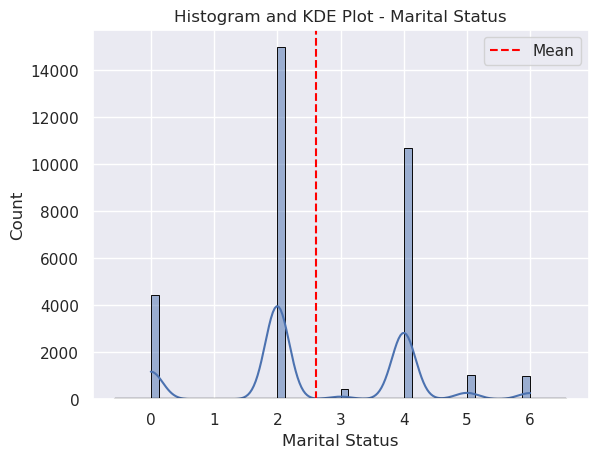

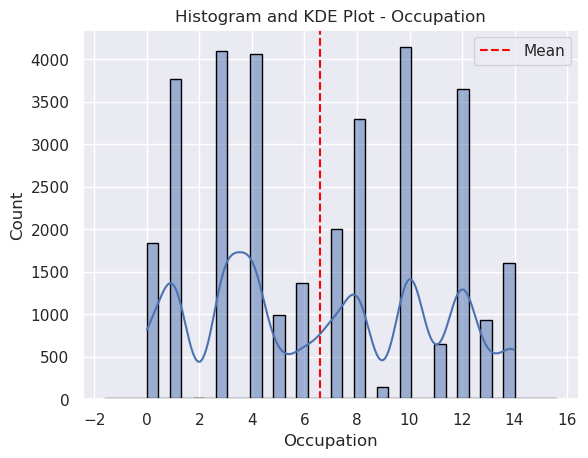

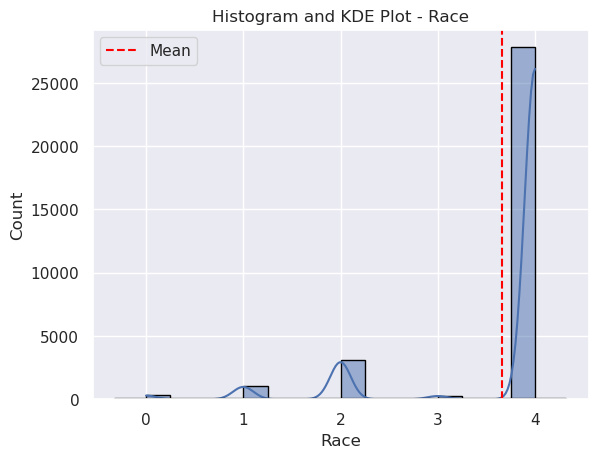

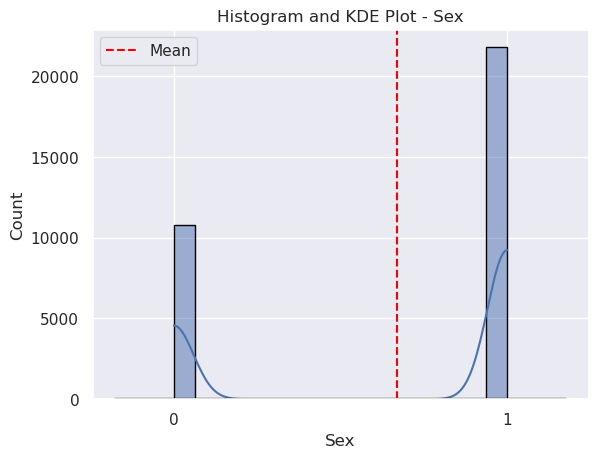

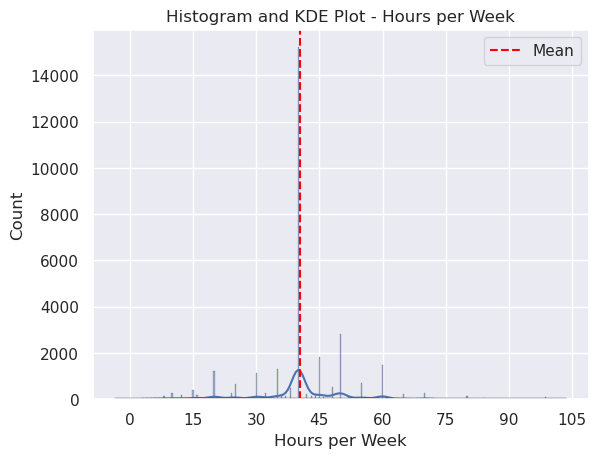

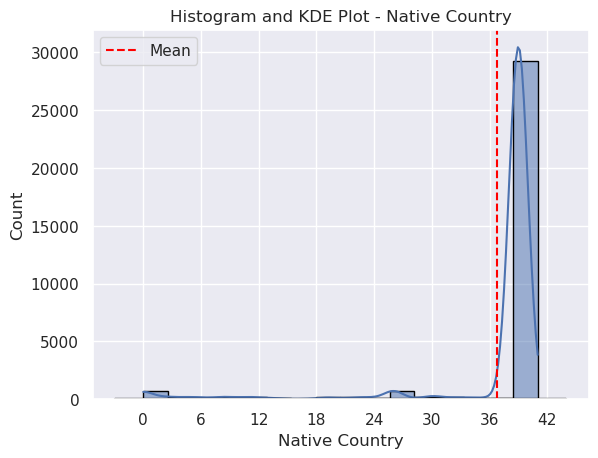

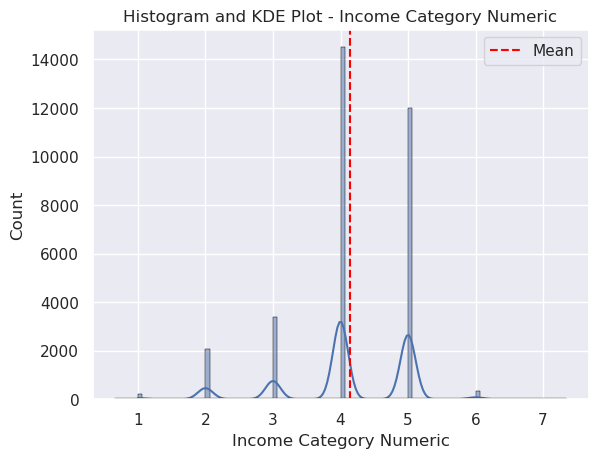

In [38]:
# histogram with kde overlay
for col in numeric_cols:
    fig, ax = plt.subplots()

    # Histogram
    sns.histplot(x=col, data=income_df, kde=True, ax=ax, edgecolor='black')
    ax.set_title(f'Histogram and KDE Plot - {col}')

    # KDE plot
    sns.kdeplot(x=col, data=income_df, ax=ax, color='black', linewidth=2)
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    # mean
    mean_value = income_df[col].mean()
    ax.axvline(mean_value, color='red', linestyle='--', label='Mean')
    ax.legend()

    plt.show()

## Boxplot, Barplot & Histogram Analysis

Age: There seems to be a slight skew towards younger age groups, primarily falling within the range of 20 to 50 years. The average age hovers slightly below 40, while the youngest age recorded is just under 20. Notably, there are a few outliers in the higher age range, specifically between 80 and 90 years. This finding aligns with expectations, as most working individuals are typically within a certain age range, with a gradual decline as retirement age approaches.

Education-Num: The attribute 'Education-Num' represents the numerical representation of education levels. The values span from 1 to 16, with an average education level of approximately 10. The largest number of individuals have a 9th education while there is also a smaller spike in individuals who have one year of college experience. This insight suggests that the majority of individuals possess at least a high school education, while there are a few outliers who have not completed middle school or education below that level.

Maritial Status: Most individuals are either married (encoded as 2) or never married (encoded as 4). There is also a small number of people who have been divorced. I am guessing that this aligns with the high average income as many individuals in this dataset are married and have double the income.

Occupation: This seems to be the most diverse range amongst the attributes where there is a good mix of occupations. There isn't a skew toward any particular area.

Race: Most individuals were predominantly white in this dataset. Unfortunately with this bias, I forsee the classification model may not have a good chance of predicting income for other races.

Sex: This is skewed toward male as males make up over double the amount of the dataset of females. I also forsee this bias interfering with proper income prediction for sex. 

Hours per Week: In terms of working hours, the observed range spans from 1 to 99 hours per week, with an average of approximately 40 hours. Most individuals tend to work between 30 and 55 hours, with notable outliers distributed on either end of the spectrum. These working hour patterns align with expectations based on American culture and labor laws. Higher hour counts may be attributed to salaried positions, self-employment situations, or individuals holding multiple jobs.

Native Country: Most individuals in this dataset are from the United States with very few individuals having different birthplaces. 

Income Category Numeric: The attribute 'Income Category Numeric' represents the numerical representation of income categories. The values encompass a range from 1 to 7, with a mean value of approximately 4, indicative of the income category spanning 100,000 to 200,000. The majority of individuals fall within the income categories of 3 (50,000 to 100,000) and 6 (500,000 to 1,000,000). These findings come as quite surprising, raising questions about potential sampling biases for individuals with higher incomes.

## Correlation: Scatterplot & Correlation Matrix
I found that scatterplot was a great way to visualize the correlation between each attribute and Income while the correlation matrix gave a correlation value that was easy to read. 

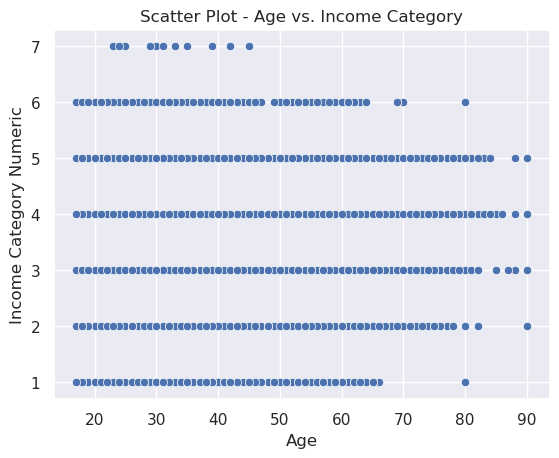

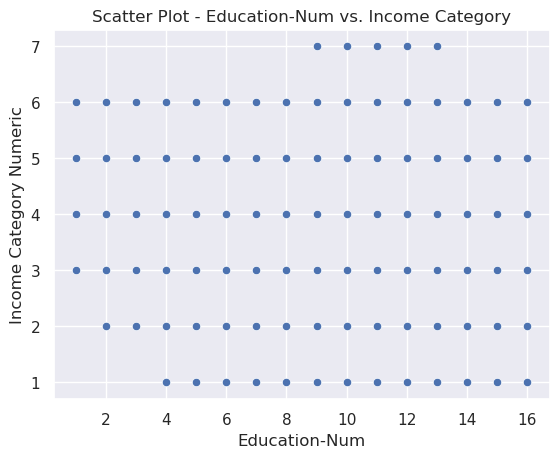

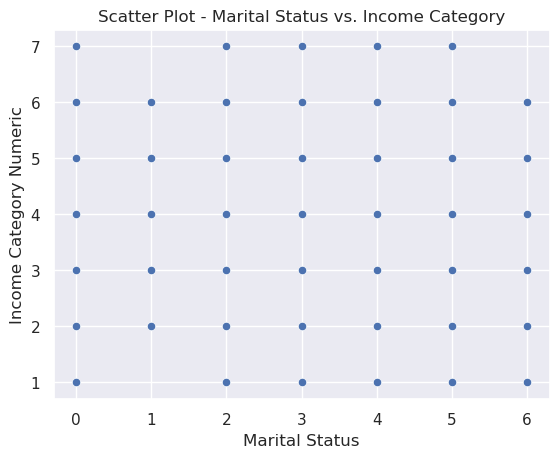

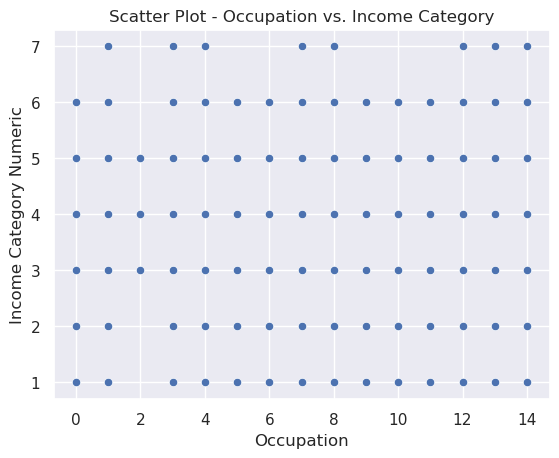

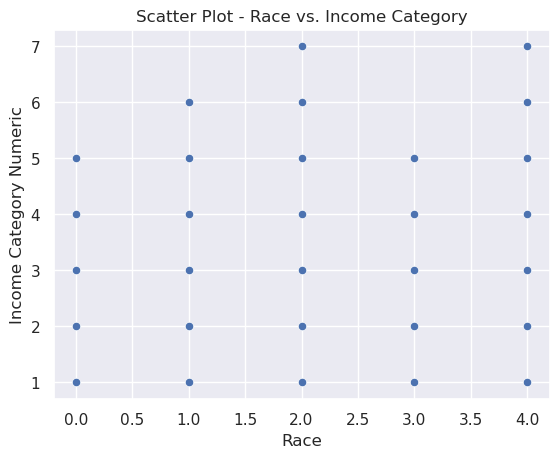

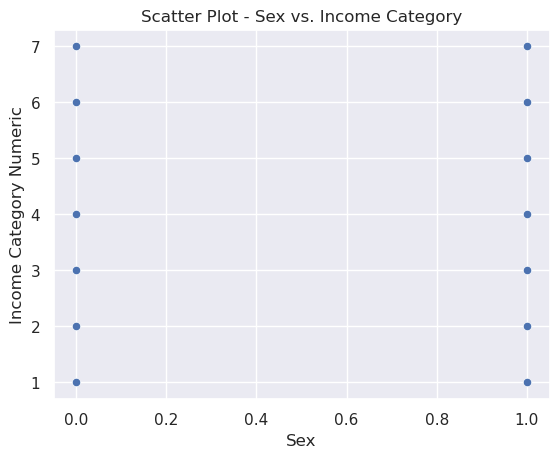

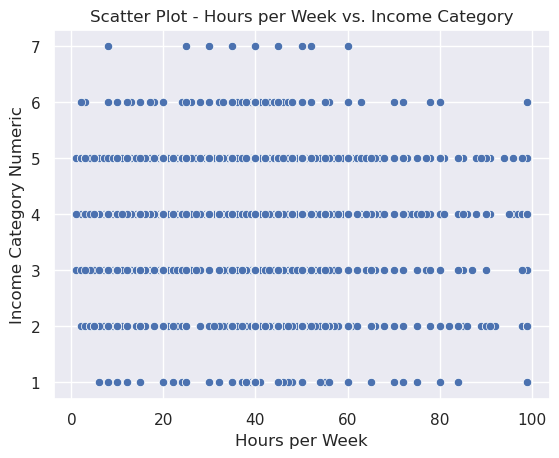

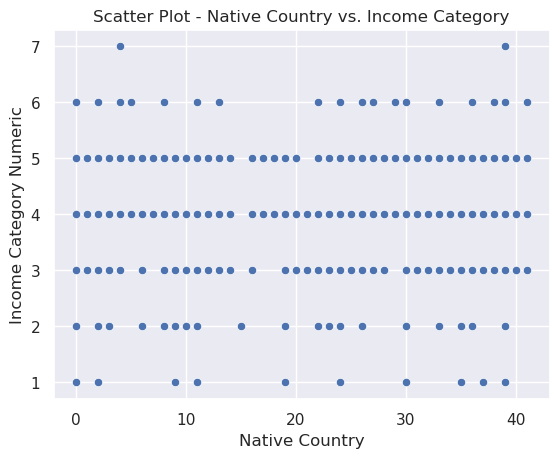

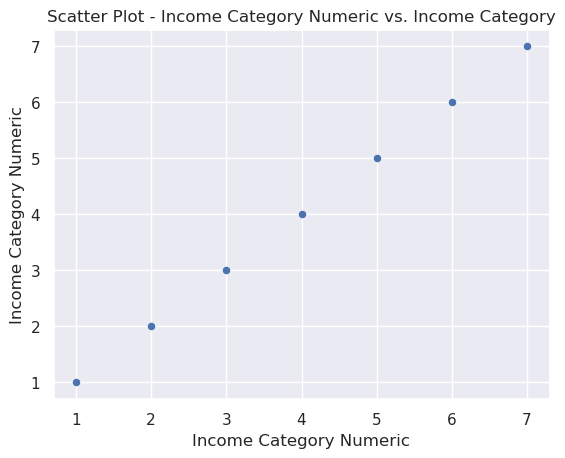

In [39]:
# Create scatter plots for each numeric column
for col in numeric_cols:
    sns.scatterplot(x=col, y='Income Category Numeric', data=income_df)
    plt.title(f'Scatter Plot - {col} vs. Income Category')
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
    plt.show()



/tmp/ipykernel_140/4248210967.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = income_df.corr()


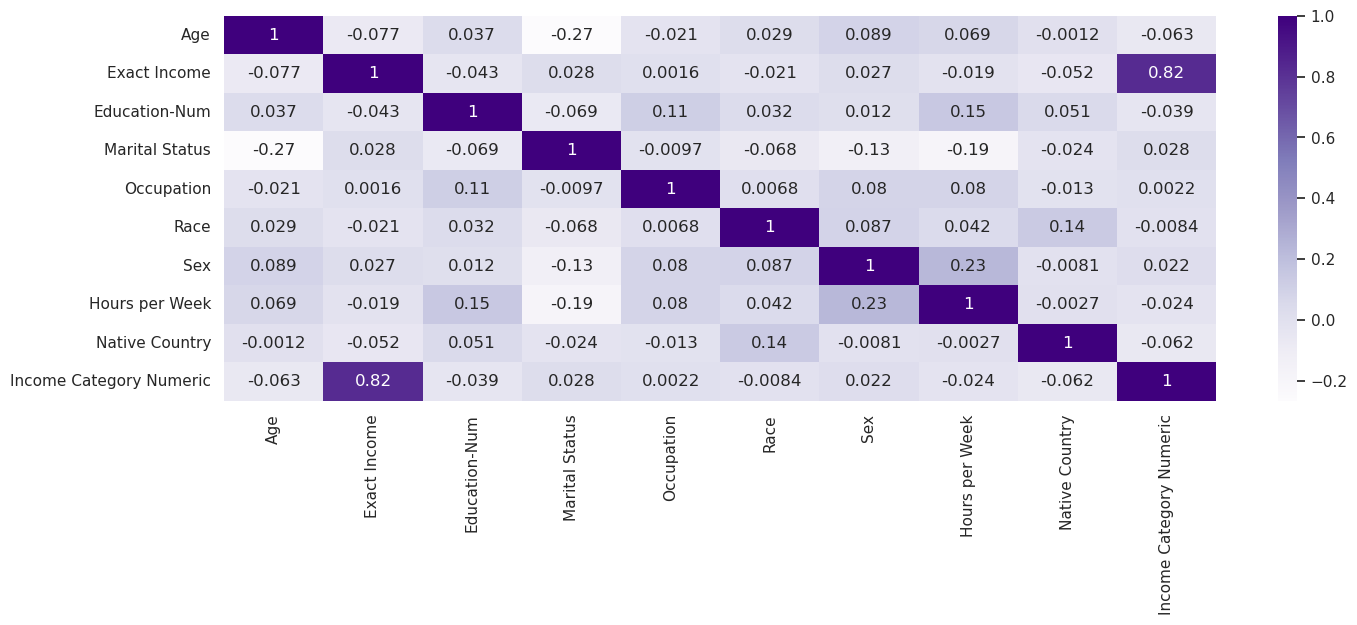

In [40]:
# matrix for correlation between numeric variables 
fig, ax = plt.subplots(figsize=(16,5))
correlation = income_df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, ax=ax, cmap="Purples");

## Correlation Analysis

Age: There is a weak negative correlation (-0.06) between age and the income category suggesting that younger individuals tend to be more likely to fall into lower income categories, while older individuals are more likely to be in higher income categories.

Education-Num: There is a weak negative correlation (-0.04) between education-num and the income category suggesting that individuals with higher levels of education tend to have a slightly higher likelihood of falling into higher income categories.

Marital Status: There is a weak positive correlation (0.03) between marital status and the income category suggesting that being married is slightly associated with a higher likelihood of belonging to higher income categories.

Occupation: There is a weak positive correlation (0.002) between occupation and the income category suggesting that certain occupations may be slightly more prevalent in higher income categories.

Race: There is a weak negative correlation (-0.008) between race and the income category suggesting that race has a minimal impact on the likelihood of falling into different income categories.

Sex: There is a weak positive correlation (0.02) between sex and the income category suggesting that being male is slightly associated with a higher likelihood of belonging to higher income categories compared to being female.

Hours per Week: There is a weak negative correlation (-0.02) between hours per week and the income category suggesting that working more hours per week is associated with a slightly higher likelihood of falling into higher income categories.

Native Country: There is a weak negative correlation (-0.06) between native country and the income category suggesting that the country of origin has a minimal impact on the likelihood of belonging to different income categories.

## Summary of Data Cleaning and Findings

- Dropped columns Capital Gain and Capital Loss as data was already included in Exact Income column
- Dropped column Workclass because most data was labeled as 'private' 
- Null data was not found 
- Income Category Numeric and Income Category were created to serve as target outcome to better visualize income in graphs due to skew
- Income column removed  
- Considering dropping Native Country as most individuals are from the United States and predictions would only skew toward that
- Considering dropping Race as most individuals are white and predictions would only skew toward that
- All attributes have a weak correlation to Income Category Numeric - could this lead to a model that shows inaccurate predictions?

## Model Approach

All three of these models are worth considering as they are well-suited for handling both numeric and categorical predictors, both of which are present in my dataset.

Logistic Regression: I will opt for this model as it aligns with my categorical target variable and holds promise in effectively capturing the intricate relationship between the predictor attributes and the target attribute. While it falls within the realm of moderate flexibility, it assumes linearity, which may pose some challenges given the weak correlations observed in my dataset that do not necessarily conform to linear relationships.

KNN: This model can measure the distance between my predictor and target data points within a multidimensional space to determine their classification. Among the three models, it stands out as highly flexible, adept at adapting to complex data patterns without imposing rigid assumptions. Such flexibility will prove highly advantageous, particularly considering the presence of weak correlations within my dataset.

Naive Bayes: This model uses Bayes' theorem with the assumption of independence between predictors, which can be particularly effective with this dataset given the weak correlations. This model demonstrates the ability to estimate probabilities associated with different income categories based on the predictor variables. It showcases flexibility alongside its simplicity and computational efficiency, making it adept at handling noise and delivering reliable results.